In [32]:
##### 착한 가게 업종별 비율, 워드 클라우드

In [33]:
# 시각화 라이브러리 설치하기
!pip install matplotlib
!pip install seaborn
!pip install wordcloud

In [34]:
# import 하기
import numpy as np # Numpy(넘파이) 패키지 임포트
import pandas as pd # pandas(판다스) 패키지 임포트
import matplotlib.pyplot as plt 
# Matplotlib(맷플롯립) 패키지의 pyplot 모듈을 plt로 임포트
from matplotlib import rcParams # 한글 환경 설정을 위한 rcParams 임포트
import seaborn as sns # Seaborn(씨본) 패키지 임포트
import matplotlib as mpl
import matplotlib.font_manager as fm

# 워드클라우드 생성을 위한 패키지
from wordcloud import WordCloud
# 워드클라우드 모양을 변형시키고자 하는 이미지 활용에 사용되는 패키지
from PIL import Image

In [35]:
# 그래프에 한글이 나오도록 설정하는 코드

mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'

font_name = fm.FontProperties(fname = path, size = 50).get_name()

plt.rc('font', family=font_name)

In [36]:
# 지역별 데이터 병합하기

# 전체 데이터 불러오기
local_csv_list = []

# enumerate : '열거하다', 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체 반환
for i, file in enumerate(['Busan.csv', 'Chungbuk.csv', 'Chungnam.csv','Daegu.csv','Daejeon.csv','Gangwon.csv','Gwangju.csv','Gyeonggi.csv','Gyeongsangbuk.csv','Gyeongsangnam.csv','Incheon.csv','Jeju.csv','Jeollabuk.csv','Jeonllanam.csv','Sejong.csv','Seoul.csv','Ulsan.csv']):
    # i엔 인덱스를, file엔 csv 파일을 입력받게 됨
    local_file = pd.read_csv(r'C:\Users\GJ\Desktop\wordcloud\DataPreprocessing_csv\{}'.format(file))
    # file 포맷팅을 통해 csv 파일 불러오기

    local_csv_list.append(local_file)
    # 리스트 local_csv_list에 추가하기

In [37]:
local_file_con = pd.concat(local_csv_list)
local_file_con.head()

# 필요없는 칼럼 삭제하기
local_file_con.drop('Unnamed: 0', axis=1, inplace=True)
local_file_con.drop('주소_구,군', axis=1, inplace=True)
local_file_con

,업종,업소명,주요품목,가격,연락처,주소,카카오별점,네이버별점,위도,경도
0,세탁업,대저기계세탁소,정장한벌,8000원,051-973-5434,부산광역시 강서구 대저로 279 (대저1동),별점없음,별점없음,35.21257237,128.982663
1,한식_일반,배부른밥집,정식,6000원,051-338-3222,부산광역시 북구 의성로112번길62,별점없음,별점없음,35.21112296,129.014363
2,한식_면류,시골칼국수,칼국수,5000원,051-000-0000,부산광역시 북구 금곡대로185-10 1층 4호,4.5,4.51,35.22572234,129.009545
3,한식_분식,깡통골목할매 유부전골 본점,유부전골,6000원,512471878,부산광역시 부산 중구 부평3길 29 (부평동1가),3.0,4.31,35.10203753,129.027061
4,한식_일반,두래박,수제돈가스,9000원,051-611-3651,부산광역시 남구 부산광역시 남구 유엔평화로 133(용당동),5.0,별점없음,35.12432167,129.096548
...,...,...,...,...,...,...,...,...,...,...
112,이미용업,선경이용원,컷트,5000원,052-246-1703,울산광역시 중구 유곡로 10(우정동),별점없음,별점없음,35.558237,129.308455
113,이미용업,현대이용원,커트,10000원,052-260-6123,울산광역시 남구 돋질로251번길 38,별점없음,별점없음,35.546786,129.331298
114,이미용업,경주이용원,컷트,12000원,010-4907-9990,울산광역시 남구 월평로159번길 4,별점없음,별점없음,35.545149,129.322629
115,중식,중화루,자장면,6000원,052-224-0392,울산광역시 남구 삼호로11번길 32,별점없음,4.39,35.55117,129.268275


In [38]:
local_file_con['업종'].unique()

all = local_file_con['업종'].count()


In [39]:
# 세탁업 수 구하기
clean = local_file_con.loc[local_file_con['업종'] == '세탁업'].count()

clean

# 세탁업 비율 구하기
clean_per = round((clean/all)*100, 2)

clean_percent = clean_per['업종']

In [40]:
# 한식 수 구하기
korean_food01 = local_file_con.loc[local_file_con['업종'] == '한식_일반'].count()
korean_food02 = local_file_con.loc[local_file_con['업종'] == '한식_면류'].count()
korean_food03 = local_file_con.loc[local_file_con['업종'] == '한식_분식'].count()
korean_food04 = local_file_con.loc[local_file_con['업종'] == '한식_육류'].count()
korean_food05 = local_file_con.loc[local_file_con['업종'] == '한식_기타'].count()
korean_food06 = local_file_con.loc[local_file_con['업종'] == '한식_해산물'].count()
korean_food07 = local_file_con.loc[local_file_con['업종'] == '한식_찌개류'].count()
korean_food08 = local_file_con.loc[local_file_con['업종'] == '한식_한정식'].count()

korean_food = korean_food01 + korean_food02+korean_food03+korean_food04+korean_food05+korean_food06+korean_food07+korean_food08

korean_food.iloc[1]

4392

In [41]:

# 한식 비율 구하기
korean_per = round((korean_food/all)*100, 2)

In [42]:

korean_percent = korean_per['업종']

In [43]:
# 중식 수 구하기
china = local_file_con.loc[local_file_con['업종'] == '중식'].count()

# 중식 비율 구하기
china_per = round((china/all)*100, 2)

china_percent = china_per['업종']

In [44]:
# 양식 수 구하기
foreign_food01 = local_file_con.loc[local_file_con['업종'] == '기타양식'].count()
foreign_food02 = local_file_con.loc[local_file_con['업종'] == '양식'].count()
foreign_food = foreign_food01 + foreign_food02
foreign_food

# 양식 비율 구하기
foreign_per = round((foreign_food/all)*100,2)

foreign_percent = foreign_per['업종']

In [45]:
# 기타서비스업 구하기
service = local_file_con.loc[local_file_con['업종'] == '기타서비스업'].count()
service

# 서비스업 비율 구하기
service_per = round((service/all)*100,2)

service_percent = service_per['업종']
service_percent

2.82

In [46]:
# 이미용업 구하기
beauty = local_file_con.loc[local_file_con['업종'] == '이미용업'].count()
beauty

# 이미용업 비율 구하기
beauty_per = round((beauty/all)*100, 2)

beauty_percent = beauty_per['업종']

In [47]:
# 목욕업 구하기
bath = local_file_con.loc[local_file_con['업종'] == '목욕업'].count()
bath

# 목욕업 비율 구하기
bath_per = round((bath/all)*100,2)

bath_percent = bath_per['업종']

In [48]:
# 숙박업 구하기
sleep = local_file_con.loc[local_file_con['업종'] == '숙박업'].count()
sleep

# 숙박업 비율 구하기
sleep_per = round((sleep/all)*100,2)

sleep_percent = sleep_per['업종']

In [55]:
# 기타 구하기
gita_percent = 1.12

In [56]:
data = {
    'labels' : ['세탁업', '한식', '중식', '양식', '서비스업', '이미용업', '목욕업', '숙박업','기타'],
    'ratio' : [clean_percent, korean_percent, china_percent, foreign_percent, service_percent, beauty_percent, bath_percent, sleep_percent, gita_percent]
        }

In [57]:
df = pd.DataFrame(data)
df

,labels,ratio
0,세탁업,2.80
1,한식,62.02
2,중식,6.02
3,양식,5.30
4,서비스업,2.82
5,이미용업,17.90
6,목욕업,0.96
7,숙박업,1.06
8,기타,1.12


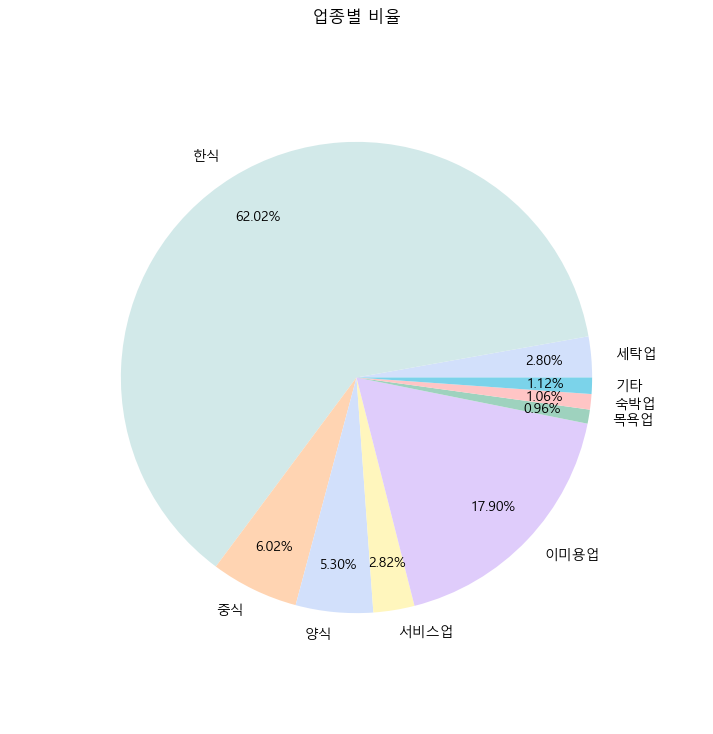

In [58]:
# 파이 차트 그리기
plt.figure(figsize=(9,9))
# 그래프 크기 설정

# 파이 차트를 그리기 위한 데이터 설정
labels = df['labels']
color = ['#D2E0FB', '#D2E9E9', '#FFD4B2', '#D2E0FB', '#FFF6BD', '#DFCCFB', '#9ED2BE', '#FFC5C5', '#7BD3EA']
ratio = df['ratio']

plt.title('업종별 비율')
plt.pie(ratio, labels=labels, colors=color, autopct='%.2f%%', pctdistance=0.8, radius=0.85)
plt.show()

##### WordCloud

In [59]:
data2 = {
    'labels' : ['세탁업', '한식', '중식', '양식', '서비스업', '이미용업', '목욕업', '숙박업'], 
    'count' : [clean.iloc[1], korean_food.iloc[1], china.iloc[1], foreign_food.iloc[1], service.iloc[1], beauty.iloc[1], bath.iloc[1], sleep.iloc[1]]
        }


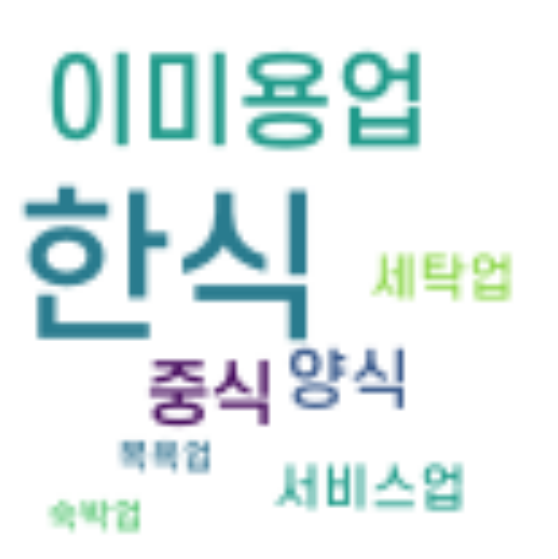

In [83]:

data2 = {
    'labels': ['세탁업', '한식', '중식', '양식', '서비스업', '이미용업', '목욕업', '숙박업'],
    'count': [clean.iloc[1], korean_food.iloc[1], china.iloc[1], foreign_food.iloc[1], service.iloc[1], beauty.iloc[1], bath.iloc[1], sleep.iloc[1]]
}
    
df2 = pd.DataFrame(data2)
df2_dict = df2.set_index('labels').to_dict()['count']

# 나눔고딕 폰트를 사용하도록 수정
wordcloud_instance = WordCloud(font_path='SCDream5.otf', width=100, height=100, max_font_size=30, background_color='white').generate_from_frequencies(df2_dict)

# img = Image.open('store.png')
# imgArray = np.array(img)

plt.figure(figsize=(7, 7))
plt.imshow(wordcloud_instance, interpolation='bilinear')
plt.axis('off')
plt.show()